In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pylab import rcParams
from scipy import stats

In [ ]:
import os
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import fetch_20newsgroups, load_files
from scipy.sparse import csr_matrix

Задание 1 Загрузите файл HR.csv в pandas dataframe

In [ ]:
df_hr = pd.read_csv('HR.csv')
df_hr.columns = df_hr.columns.str.lower()
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df_hr.isna().sum()
#Пропусков нет

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
df_hr_numerical = df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'left', 'promotion_last_5years']]
df_hr_numerical

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [ ]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Задание 2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
df_hr_numerical.describe()
#Среднее, мин и макс значения 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df_hr_numerical.mode()
# Мода

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


In [ ]:
# Мода
for x in df_hr_numerical:
    Moda = df_hr_numerical[x].mode()
    print(x, f' Мода:, {Moda[0]}')

satisfaction_level  Мода:, 0.1
last_evaluation  Мода:, 0.55
number_project  Мода:, 4
average_montly_hours  Мода:, 135
time_spend_company  Мода:, 3
work_accident  Мода:, 0
left  Мода:, 0
promotion_last_5years  Мода:, 0


In [ ]:
df_hr_numerical.std(ddof=1) 
#Cреднее отклонение

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

In [ ]:
df_hr_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


Задание 3.

Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

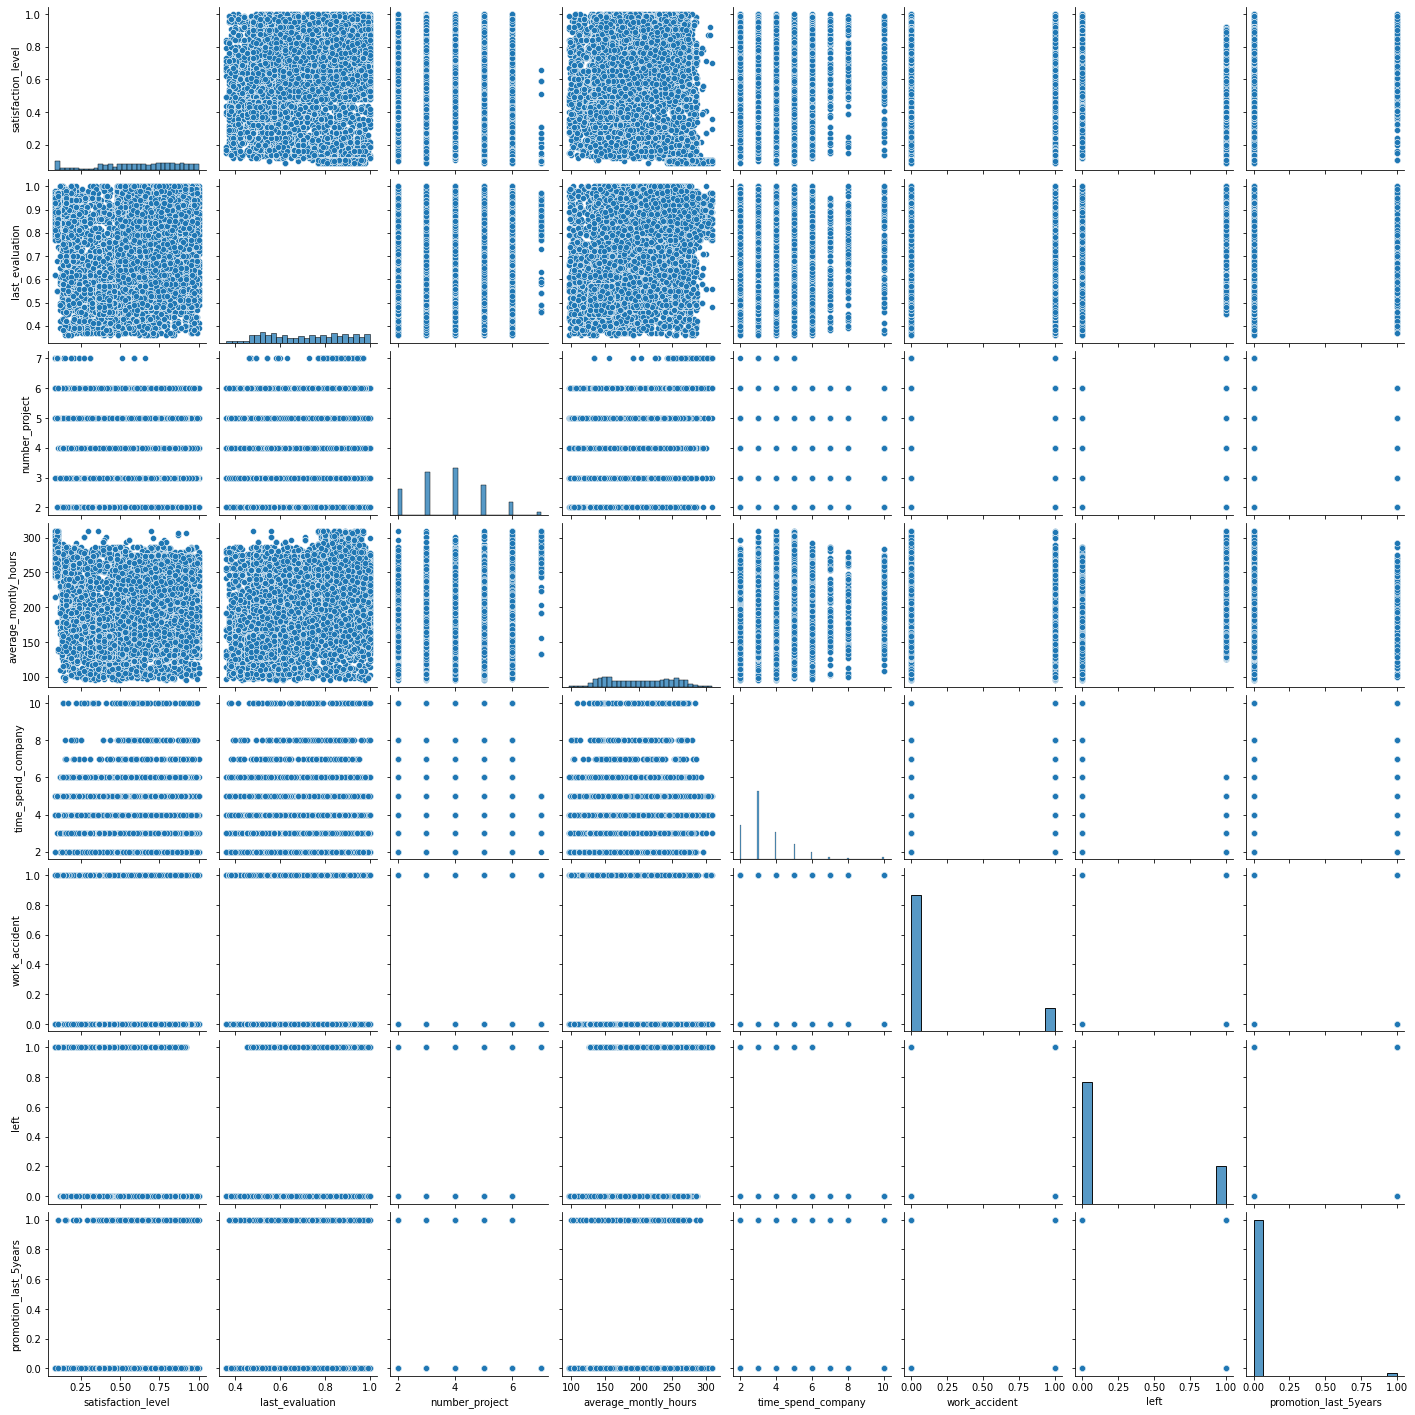

In [ ]:
sns.pairplot(df_hr_numerical)

In [ ]:
df_hr_numerical.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [ ]:
df_hr_numerical.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


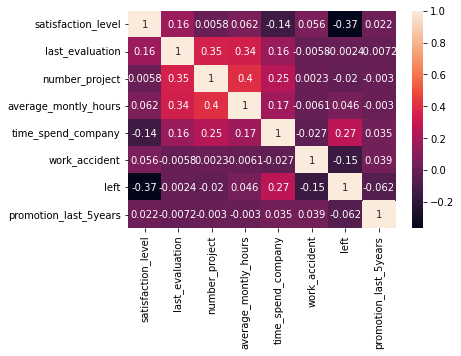

In [ ]:
xx= df_hr_numerical.corr(method='spearman')
sns.heatmap(xx, annot=True)

In [ ]:
#Менее коррелированные переменные это:
df_hr_numerical[['number_project', 'work_accident']].corr(method='spearman')

,number_project,work_accident
number_project,1.000000,0.002328
work_accident,0.002328,1.000000


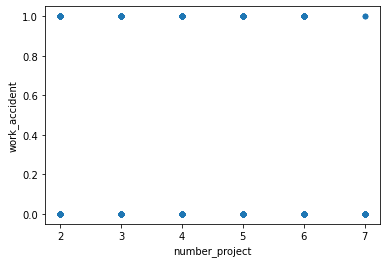

In [ ]:
df_hr_numerical.plot(kind='scatter', 
        x='number_project', 
        y='work_accident'
       )

In [ ]:
#Менее коррелированные отрицательные переменные это:
df_hr_numerical [['last_evaluation', 'left']].corr(method='spearman')

,last_evaluation,left
last_evaluation,1.00000,-0.00244
left,-0.00244,1.00000


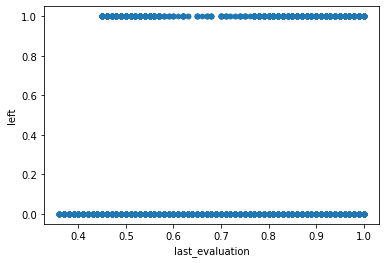

In [ ]:
df_hr_numerical.plot(kind='scatter', 
        x='last_evaluation', 
        y='left'
       )

In [ ]:
#Более коррелированные переменные это:
df_hr_numerical[['average_montly_hours', 'number_project']].corr(method='spearman')

,average_montly_hours,number_project
average_montly_hours,1.000000,0.397855
number_project,0.397855,1.000000


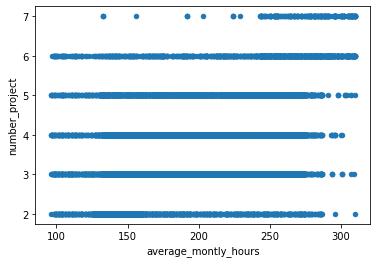

In [ ]:
df_hr_numerical.plot(kind='scatter', 
        x='average_montly_hours', 
        y='number_project'
       )

In [ ]:
#Более коррелированные отрицательные переменные это:
df_hr_numerical[['satisfaction_level', 'left']].corr(method='spearman')

,satisfaction_level,left
satisfaction_level,1.000000,-0.365842
left,-0.365842,1.000000


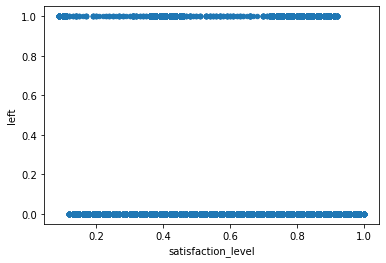

In [ ]:
df_hr_numerical.plot(kind='scatter', 
        x='satisfaction_level', 
        y='left'
       )

Вывод: 


Корреляция имее следующие показания



*   Менее коррелированные переменные:
        number_project	1.000000	0.002328
        work_accident	0.002328	1.000000


*   Менее коррелированные отрицательные переменные:
        last_evaluation	1.00000	-0.00244
        left	-0.00244	1.00000


*   Более коррелированные переменные:
        average_montly_hours	1.000000	0.397855
        number_project	0.397855	1.000000


*   Более коррелированные отрицательные переменные:

        satisfaction_level	1.000000	-0.365842
        left	-0.365842	1.000000


Задание 4.

Рассчитайте сколько сотрудников работает в каждом департаменте.

In [ ]:
from collections import Counter

In [ ]:
df_hr.groupby(['department']).size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

Вывод:

Как видно по результатам отдел продаж самый многочисленный в компании.


Задание 5

Показать распределение сотрудников по зарплатам

In [ ]:
Department = df_hr.groupby(['department', 'salary'])[['satisfaction_level']].count()
Department.columns = ['count']
Department

count
department  salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

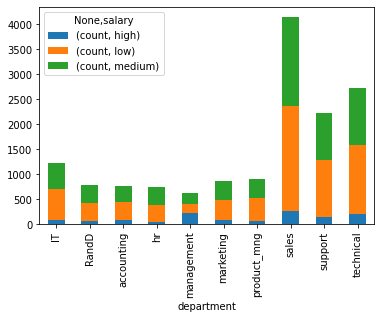

In [ ]:
Department.unstack().plot.bar(stacked=True)

Задание 6

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
df_hr.groupby(['department', 'salary', ])[['satisfaction_level']].count()

satisfaction_level
department  salary                    
IT          high                    83
            low                    609
            medium                 535
RandD       high                    51
            low                    364
            medium                 372
accounting  high                    74
            low                    358
            medium                 335
hr          high                    45
            low                    335
            medium                 359
management  high                   225
            low                    180
            medium                 225
marketing   high                    80
            low                    402
            medium                 376
product_mng high                    68
            low                    451
            medium                 383
sales       high                   269
            low                   2099
            medium                1772
support     high                   141
            low                   1146
            medium                 942
technical   high                   201
            low                   1372
            medium                1147

Задание 7

Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимо кладом

In [ ]:
df_low = df_hr[df_hr['salary'] == 'low']['average_montly_hours']
df_low

0        157
3        223
4        159
5        153
6        247
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 7316, dtype: int64

In [ ]:
df_high = df_hr[df_hr['salary'] == 'high']['average_montly_hours']
df_high

72       149
111      289
189      156
267      129
306      149
        ... 
14829    148
14868    130
14902    159
14941    131
14980    238
Name: average_montly_hours, Length: 1237, dtype: int64

In [ ]:
from scipy import stats
result = stats.ttest_ind(a=df_low, b=df_high, equal_var=False)
print(result)
# альфа = 5%, или 0,05
alpha = 0.05
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, время работы сотрудников с высоким и низким окладом не одинаково')
else:
    print('Не отвергаем нулевую гипотезу, сотрудники работают одинаково')

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу, сотрудники работают одинакого


Задание 8

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

*   Доля сотрудников с повышением за последние 5 лет;

*   Средняя степень удовлетворенности;

*   Среднее количество проектов.



In [ ]:
employees = df_hr['left'].count()
print(f' Количество сотрудников {employees}')

df_left = df_hr.groupby(df_hr['left'] == 1)['promotion_last_5years'].sum()
print(f' Сотрудников уволились после повышения : {df_left[1]}')

l = df_left[1]/employees*100
print(f' Доля сотрудников уволившихся после повышения: {l.round(1)}%')

df_not_left = df_hr.groupby(df_hr['left'] == 0)['promotion_last_5years'].sum()
print(f' Сотрудников остались работать после повышения : {df_not_left[1]}')

d = df_not_left[1]/employees*100
print(f' Доля сотрудников не уволившихся после повышения: {d.round(1)}%')

 Количество сотрудников 14999
 Сотрудников уволились после повышения : 19
 Доля сотрудников уволившихся после повышения: 0.1%
 Сотрудников остались работать после повышения : 300
 Доля сотрудников не уволившихся после повышения: 2.0%


In [ ]:
df_maen_left = df_hr.groupby(df_hr['left'] == 1)['satisfaction_level'].mean()
df_maen_left
print(f' Средняя оценка удовлетворения у уволившихся : {df_maen_left[1]}')

df_maen_not_left = df_hr.groupby(df_hr['left'] == 0)['satisfaction_level'].mean()
df_maen_not_left
print(f' Средняя оценка удовлетворения у  не уволившихся : {df_maen_not_left[1]}')

 Средняя оценка удовлетворения у уволившихся : 0.44009801176141133
 Средняя оценка удовлетворения у  не уволившихся : 0.666809590479524


In [ ]:
df_project_left = df_hr.groupby(df_hr['left'] == 1)['number_project'].mean()
df_project_left
print(f' Средняя количество проектов у уволившигося сотрудника : {df_project_left[1]}')

df_project_not_left = df_hr.groupby(df_hr['left'] == 0)['number_project'].mean()
print(f' Средняя количество проектов у не уволившигося сотрудника : {df_project_not_left[1]}')

 Средняя количество проектов у уволившигося сотрудника : 3.8555026603192384
 Средняя количество проектов у не уволившигося сотрудника : 3.786664333216661


 Вывод:

*   Количество сотрудников 14999;
 
*   Сотрудников уволились после повышения : 19;

*   Доля сотрудников уволившихся после повышения: 0.1%;

*   Сотрудников остались работать после повышения : 300;

*   Доля сотрудников не уволившихся после повышения: 2.0%;

*   Средняя оценка удовлетворения у уволившихся : 0ю44009801176141133;

*   Средняя оценка удовлетворения у  не уволившихся : 0.666809590479524;

*   Средняя количество проектов у уволившигося сотрудника : 3.8555026603192384;

*   Средняя количество проектов у не уволившигося сотрудника : 3.786664333216661.










Задание 9

Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)Оценить качество модели на тестовой выборки

In [ ]:
df_hr_numerical = df_hr.drop(['department', 'salary', 'left'], axis=1)
df_hr_numerical

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [ ]:
df_target = df_hr['left']
y = df_target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_hr_numerical, y, test_size=0.25, random_state = 12)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [ ]:
lr = LinearDiscriminantAnalysis()

In [ ]:
lr.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test, y_pred)

0.7533333333333333

In [ ]:
X_test['predickt'] = y_pred 
X_test['test'] = y_test
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,predickt,test
2429,0.47,0.86,4,169,6,0,0,0,0
14527,0.43,0.47,2,135,3,0,0,0,1
13038,0.65,0.98,3,252,2,0,0,0,0
7160,0.46,0.53,3,135,2,0,0,0,0
1662,0.81,0.83,5,269,6,0,0,0,1
...,...,...,...,...,...,...,...,...,...
10977,0.16,0.61,4,171,6,0,0,1,0
1316,0.88,1.00,5,247,5,0,0,0,1
1288,0.87,0.81,5,304,5,0,0,0,1
2264,0.47,0.64,3,192,3,0,0,0,0


In [ ]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, y_pred)

In [ ]:
results 

array([[2596,  238],
       [ 687,  229]])

Вывод:

*   2596 модель правильно определила что люди остались;

*   229 правильно определила увольнение;

*   687 не правильно определила, что люди уволяться, они остались;

*   238 не правильно определила, что люди остануться, они уволились;

*   Модель более точно определяет людей которые остаются.



